In [1]:
import re
def findHashtags(tweet):
    return re.findall(r"#(\w+)", tweet)

In [2]:
listOfHashtags = []
def findHashtagsList(liste):
    temp = []
    for elem in liste:
        temp.extend(findHashtags(elem))
    return temp

In [ ]:
from pyspark import SparkContext
import pyspark
from pyspark.sql import SparkSession
from pyspark.streaming import StreamingContext

sc = SparkContext("local", "TCP Stream")
ssc = StreamingContext(sc, 1)

lines = ssc.socketTextStream("localhost", 12345)

lines.foreachRDD(lambda rdd: listOfHashtags.extend(findHashtagsList(rdd.collect())))

ssc.start()
ssc.awaitTermination()

In [ ]:
ssc.stop()
import pyspark
from pyspark.sql import SparkSession

sc = SparkContext.getOrCreate()
rdd = sc.parallelize(listOfHashtags)
paired_rdd = rdd.map(lambda x:(x,1))
count = paired_rdd.reduceByKey(lambda x,y: x+y)
sorted_rdd = count.sortBy(lambda x: x[1], ascending=False)

In [5]:
results = sorted_rdd.take(10) #list
results

[('NHLAllStarVote', 9),
 ('cigli', 9),
 ('iHeartAwards', 9),
 ('KitTaseronlarKadrosuz', 5),
 ('شهيد_الجمعة_مرجع_الاصلاح', 4),
 ('BestFanArmy', 3),
 ('ท', 3),
 ('BestMusicVideo', 3),
 ('PriyankaChaharChoudhary', 3),
 ('Varisu', 3)]

In [6]:
keys = [key[0] for key in results]
values = [value[1] for value in results]

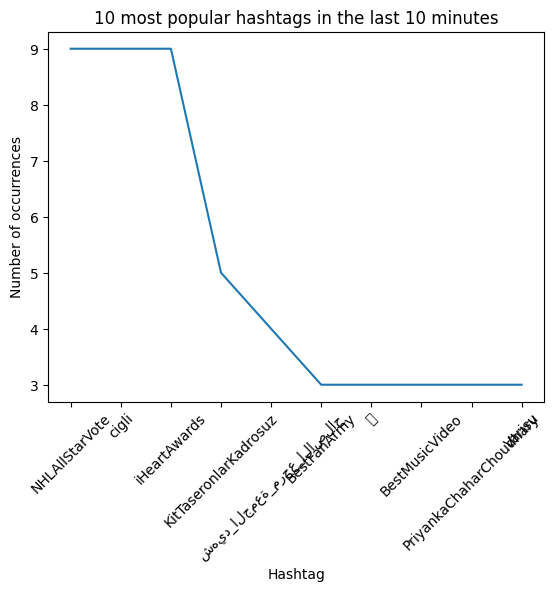

In [7]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

plt.title("10 most popular hashtags in the last 10 minutes")
plt.xlabel("Hashtag")
plt.ylabel("Number of occurrences")
plt.plot(keys, values)
plt.xticks(rotation=45)
plt.show()